# **Aula 1 - Preparando os Dados**

## **Preparando o Ambiente**

### [PySpark](https://spark.apache.org/docs/latest/api/python/index.html)

PySpark é uma interface para Apache Spark em Python. Ele não apenas permite que você escreva aplicativos Spark usando APIs Python, mas também fornece o *shell* PySpark para analisar interativamente seus dados em um ambiente distribuído. O PySpark oferece suporte à maioria dos recursos do Spark, como Spark SQL, DataFrame, Streaming, MLlib (Machine Learning) e Spark Core.

<center><img src="https://caelum-online-public.s3.amazonaws.com/2273-introducao-spark/01/img-001.png"/></center>

#### **Spark SQL e DataFrame**

Spark SQL é um módulo Spark para processamento de dados estruturados. Ele fornece uma abstração de programação chamada DataFrame e também pode atuar como mecanismo de consulta SQL distribuído.

#### **Spark Streaming**

Executando em cima do Spark, o recurso de *streaming* no Apache Spark possibilita o uso de poderosas aplicações interativas e analíticas em *streaming* e dados históricos, enquanto herda a facilidade de uso do Spark e as características de tolerância a falhas.

#### **Spark MLlib**

Construído sobre o Spark, MLlib é uma biblioteca de aprendizado de máquina escalonável que fornece um conjunto uniforme de APIs de alto nível que ajudam os usuários a criar e ajustar *pipelines* de aprendizado de máquina práticos.

#### **Spark Core**

Spark Core é o mecanismo de execução geral subjacente para a plataforma Spark sobre o qual todas as outras funcionalidades são construídas. Ele fornece um RDD (*Resilient Distributed Dataset*) e recursos de computação na memória.

In [1]:
#pip install pyspark

### [SparkSession](https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.sql.SparkSession.html)

O ponto de entrada para programar o Spark com a API Dataset e DataFrame.

Uma SparkSession pode ser utilizada para criar DataFrames, registrar DataFrames como tabelas, executar consultas SQL em tabelas, armazenar em cache e ler arquivos parquet. Para criar uma SparkSession, use o seguinte padrão de construtor:

In [2]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
        .master('local[*]') \
        .appName('Regressão com Spark') \
        .getOrCreate()

spark

23/10/16 20:11:40 WARN Utils: Your hostname, eugenio-virtual-machine resolves to a loopback address: 127.0.1.1; using 192.168.64.129 instead (on interface ens33)
23/10/16 20:11:40 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/10/16 20:11:42 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


**Carregamento dos Dados**

### Montando o drive

In [3]:
dados = spark.read.json(
    '/home/eugenio/Documentos/Estudos_Apache_Spark/Regressao_Apache_Spark/bases/imoveis.json',
    multiLine=False
)


In [4]:
dados.show()

+--------------------+--------------------+
|               ident|             listing|
+--------------------+--------------------+
|{775564-BOJSMVON,...|{{Rio de Janeiro,...|
|{660895-AUENKNYY,...|{{Rio de Janeiro,...|
|{751522-JESYFEQL,...|{{Rio de Janeiro,...|
|{714052-GAAEWYKS,...|{{Rio de Janeiro,...|
|{568886-ZIBFOMCC,...|{{Rio de Janeiro,...|
|{526755-OBLTYTEN,...|{{Rio de Janeiro,...|
|{593569-CJLMNFGW,...|{{Rio de Janeiro,...|
|{989181-RYJOLMCU,...|{{Rio de Janeiro,...|
|{145372-EZKAKSWM,...|{{Rio de Janeiro,...|
|{792086-NWNQTDYL,...|{{Rio de Janeiro,...|
|{339622-MNZGLKTZ,...|{{Rio de Janeiro,...|
|{952338-SVULQMXR,...|{{Rio de Janeiro,...|
|{570439-LDICQOXZ,...|{{Rio de Janeiro,...|
|{684023-YTBNKLLO,...|{{Rio de Janeiro,...|
|{629412-VKUMMAVR,...|{{Rio de Janeiro,...|
|{041590-HMJIRKDX,...|{{Rio de Janeiro,...|
|{870098-XTRYJAGY,...|{{Rio de Janeiro,...|
|{951104-MACIAPIS,...|{{Rio de Janeiro,...|
|{375665-GHMFEZXX,...|{{Rio de Janeiro,...|
|{441711-LRTWHRUA,...|{{Rio de J

In [5]:
dados.show(truncate=False)

+--------------------------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------+
|ident                     |listing                                                                                                                                                          |
+--------------------------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------+
|{775564-BOJSMVON, Website}|{{Rio de Janeiro, {-22.909429, -43.413557}, Taquara, Zona Oeste}, {0, 0, 0, 1, 0, 62, 0, 0, 62}, {45000, {150, 0}}, {Outros, Residencial}}                       |
|{660895-AUENKNYY, Website}|{{Rio de Janeiro, {-22.869698, -43.509141}, Santíssimo, Zona Oeste}, {1, 2, 0, 1, 0, 0, 0, 0, 44}, {45000, {120, 0}}, {Apartamento, Residencial}}                |
|{751522-JESYFEQL, Website}|{{Rio de Janeiro,

In [6]:
dados.count()

73615

## **Seleção de *Features***

In [7]:
dados.printSchema()

root
 |-- ident: struct (nullable = true)
 |    |-- customerID: string (nullable = true)
 |    |-- source: string (nullable = true)
 |-- listing: struct (nullable = true)
 |    |-- address: struct (nullable = true)
 |    |    |-- city: string (nullable = true)
 |    |    |-- location: struct (nullable = true)
 |    |    |    |-- lat: double (nullable = true)
 |    |    |    |-- lon: double (nullable = true)
 |    |    |-- neighborhood: string (nullable = true)
 |    |    |-- zone: string (nullable = true)
 |    |-- features: struct (nullable = true)
 |    |    |-- bathrooms: long (nullable = true)
 |    |    |-- bedrooms: long (nullable = true)
 |    |    |-- floors: long (nullable = true)
 |    |    |-- parkingSpaces: long (nullable = true)
 |    |    |-- suites: long (nullable = true)
 |    |    |-- totalAreas: string (nullable = true)
 |    |    |-- unitFloor: long (nullable = true)
 |    |    |-- unitsOnTheFloor: long (nullable = true)
 |    |    |-- usableAreas: string (nullable =

In [8]:
dados\
    .select('ident.customerID', 'listing.*')\
    .show(truncate=False)

+---------------+--------------------------------------------------------------------------------+-------------------------------+---------------------+--------------------------+
|customerID     |address                                                                         |features                       |prices               |types                     |
+---------------+--------------------------------------------------------------------------------+-------------------------------+---------------------+--------------------------+
|775564-BOJSMVON|{Rio de Janeiro, {-22.909429, -43.413557}, Taquara, Zona Oeste}                 |{0, 0, 0, 1, 0, 62, 0, 0, 62}  |{45000, {150, 0}}    |{Outros, Residencial}     |
|660895-AUENKNYY|{Rio de Janeiro, {-22.869698, -43.509141}, Santíssimo, Zona Oeste}              |{1, 2, 0, 1, 0, 0, 0, 0, 44}   |{45000, {120, 0}}    |{Apartamento, Residencial}|
|751522-JESYFEQL|{Rio de Janeiro, {-22.986927, -43.646786}, Pedra de Guaratiba, Zona Oeste}      |{0

In [9]:
dados\
    .select('ident.customerID', 'listing.types.*', 'listing.features.*', 'listing.address.*', 'listing.prices.price', 'listing.prices.tax.*')\
    .show(truncate=False)


+---------------+-----------+-----------+---------+--------+------+-------------+------+----------+---------+---------------+-----------+--------------+------------------------+------------------------+------------+-----+-----+----+
|customerID     |unit       |usage      |bathrooms|bedrooms|floors|parkingSpaces|suites|totalAreas|unitFloor|unitsOnTheFloor|usableAreas|city          |location                |neighborhood            |zone        |price|condo|iptu|
+---------------+-----------+-----------+---------+--------+------+-------------+------+----------+---------+---------------+-----------+--------------+------------------------+------------------------+------------+-----+-----+----+
|775564-BOJSMVON|Outros     |Residencial|0        |0       |0     |1            |0     |62        |0        |0              |62         |Rio de Janeiro|{-22.909429, -43.413557}|Taquara                 |Zona Oeste  |45000|150  |0   |
|660895-AUENKNYY|Apartamento|Residencial|1        |2       |0     |1

In [10]:
dados\
    .select('ident.customerID', 'listing.types.*', 'listing.features.*', 'listing.address.*', 'listing.prices.price', 'listing.prices.tax.*')\
    .drop('city', 'location', 'totalAreas')\
    .show(truncate=False)

+---------------+-----------+-----------+---------+--------+------+-------------+------+---------+---------------+-----------+------------------------+------------+-----+-----+----+
|customerID     |unit       |usage      |bathrooms|bedrooms|floors|parkingSpaces|suites|unitFloor|unitsOnTheFloor|usableAreas|neighborhood            |zone        |price|condo|iptu|
+---------------+-----------+-----------+---------+--------+------+-------------+------+---------+---------------+-----------+------------------------+------------+-----+-----+----+
|775564-BOJSMVON|Outros     |Residencial|0        |0       |0     |1            |0     |0        |0              |62         |Taquara                 |Zona Oeste  |45000|150  |0   |
|660895-AUENKNYY|Apartamento|Residencial|1        |2       |0     |1            |0     |0        |0              |44         |Santíssimo              |Zona Oeste  |45000|120  |0   |
|751522-JESYFEQL|Outros     |Residencial|0        |0       |0     |0            |0     |0 

In [11]:
dataset = dados\
    .select('ident.customerID', 'listing.types.*', 'listing.features.*', 'listing.address.*', 'listing.prices.price', 'listing.prices.tax.*')\
    .drop('city', 'location', 'totalAreas')


## **Tratamento de Dados**

In [12]:
dataset.printSchema()

root
 |-- customerID: string (nullable = true)
 |-- unit: string (nullable = true)
 |-- usage: string (nullable = true)
 |-- bathrooms: long (nullable = true)
 |-- bedrooms: long (nullable = true)
 |-- floors: long (nullable = true)
 |-- parkingSpaces: long (nullable = true)
 |-- suites: long (nullable = true)
 |-- unitFloor: long (nullable = true)
 |-- unitsOnTheFloor: long (nullable = true)
 |-- usableAreas: string (nullable = true)
 |-- neighborhood: string (nullable = true)
 |-- zone: string (nullable = true)
 |-- price: string (nullable = true)
 |-- condo: string (nullable = true)
 |-- iptu: string (nullable = true)



In [13]:
from pyspark.sql.types import IntegerType, DoubleType

In [14]:
dataset\
    .withColumn('usableAreas', dataset['usableAreas'].cast(IntegerType()))\
    .withColumn('price', dataset['price'].cast(DoubleType()))\
    .withColumn('condo', dataset['condo'].cast(DoubleType()))\
    .withColumn('iptu', dataset['iptu'].cast(DoubleType()))\
    .printSchema()


root
 |-- customerID: string (nullable = true)
 |-- unit: string (nullable = true)
 |-- usage: string (nullable = true)
 |-- bathrooms: long (nullable = true)
 |-- bedrooms: long (nullable = true)
 |-- floors: long (nullable = true)
 |-- parkingSpaces: long (nullable = true)
 |-- suites: long (nullable = true)
 |-- unitFloor: long (nullable = true)
 |-- unitsOnTheFloor: long (nullable = true)
 |-- usableAreas: integer (nullable = true)
 |-- neighborhood: string (nullable = true)
 |-- zone: string (nullable = true)
 |-- price: double (nullable = true)
 |-- condo: double (nullable = true)
 |-- iptu: double (nullable = true)



In [15]:
dataset\
    .select('unit')\
    .groupBy('unit')\
    .count()\
    .show()


+-----------+-----+
|       unit|count|
+-----------+-----+
|     Outros| 5120|
|Apartamento|59106|
|       Casa| 9389|
+-----------+-----+



In [16]:
dataset\
    .select('zone')\
    .groupBy('zone')\
    .count()\
    .show()


+------------+-----+
|        zone|count|
+------------+-----+
|  Zona Norte|15191|
|  Zona Oeste|37116|
|Zona Central| 1921|
|    Zona Sul|19222|
|            |  165|
+------------+-----+



In [17]:
from pyspark.sql import functions as f

In [18]:
dataset.show()

+---------------+-----------+-----------+---------+--------+------+-------------+------+---------+---------------+-----------+--------------------+------------+-----+-----+----+
|     customerID|       unit|      usage|bathrooms|bedrooms|floors|parkingSpaces|suites|unitFloor|unitsOnTheFloor|usableAreas|        neighborhood|        zone|price|condo|iptu|
+---------------+-----------+-----------+---------+--------+------+-------------+------+---------+---------------+-----------+--------------------+------------+-----+-----+----+
|775564-BOJSMVON|     Outros|Residencial|        0|       0|     0|            1|     0|        0|              0|         62|             Taquara|  Zona Oeste|45000|  150|   0|
|660895-AUENKNYY|Apartamento|Residencial|        1|       2|     0|            1|     0|        0|              0|         44|          Santíssimo|  Zona Oeste|45000|  120|   0|
|751522-JESYFEQL|     Outros|Residencial|        0|       0|     0|            0|     0|        0|            

### Tratamento para dados faltantes

[Functions](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql.html#functions)


In [19]:
dataset\
    .select([f.count(f.when(f.isnan(c) | f.isnull(c), True)).alias(c) for c in dataset.columns])\
    .show()

+----------+----+-----+---------+--------+------+-------------+------+---------+---------------+-----------+------------+----+-----+-----+----+
|customerID|unit|usage|bathrooms|bedrooms|floors|parkingSpaces|suites|unitFloor|unitsOnTheFloor|usableAreas|neighborhood|zone|price|condo|iptu|
+----------+----+-----+---------+--------+------+-------------+------+---------+---------------+-----------+------------+----+-----+-----+----+
|         0|   0|    0|        0|       0|     0|            0|     0|        0|              0|          0|           0|   0|    0| 6504|9116|
+----------+----+-----+---------+--------+------+-------------+------+---------+---------------+-----------+------------+----+-----+-----+----+



In [20]:
dataset\
    .select('*')\
    .na\
    .fill(0)\
    .show()


+---------------+-----------+-----------+---------+--------+------+-------------+------+---------+---------------+-----------+--------------------+------------+-----+-----+----+
|     customerID|       unit|      usage|bathrooms|bedrooms|floors|parkingSpaces|suites|unitFloor|unitsOnTheFloor|usableAreas|        neighborhood|        zone|price|condo|iptu|
+---------------+-----------+-----------+---------+--------+------+-------------+------+---------+---------------+-----------+--------------------+------------+-----+-----+----+
|775564-BOJSMVON|     Outros|Residencial|        0|       0|     0|            1|     0|        0|              0|         62|             Taquara|  Zona Oeste|45000|  150|   0|
|660895-AUENKNYY|Apartamento|Residencial|        1|       2|     0|            1|     0|        0|              0|         44|          Santíssimo|  Zona Oeste|45000|  120|   0|
|751522-JESYFEQL|     Outros|Residencial|        0|       0|     0|            0|     0|        0|            

In [21]:
colunas_para_preencher = ["condo", "iptu"]
for coluna in colunas_para_preencher:
    dataset = dataset.na.fill(0, subset=[coluna])


In [22]:
dataset\
    .select([f.count(f.when(f.isnan(c) | f.isnull(c), True)).alias(c) for c in dataset.columns])\
    .show()


+----------+----+-----+---------+--------+------+-------------+------+---------+---------------+-----------+------------+----+-----+-----+----+
|customerID|unit|usage|bathrooms|bedrooms|floors|parkingSpaces|suites|unitFloor|unitsOnTheFloor|usableAreas|neighborhood|zone|price|condo|iptu|
+----------+----+-----+---------+--------+------+-------------+------+---------+---------------+-----------+------------+----+-----+-----+----+
|         0|   0|    0|        0|       0|     0|            0|     0|        0|              0|          0|           0|   0|    0| 6504|9116|
+----------+----+-----+---------+--------+------+-------------+------+---------+---------------+-----------+------------+----+-----+-----+----+



In [23]:
dataset\
    .select('zone')\
    .groupBy('zone')\
    .count()\
    .show()


+------------+-----+
|        zone|count|
+------------+-----+
|  Zona Norte|15191|
|  Zona Oeste|37116|
|Zona Central| 1921|
|    Zona Sul|19222|
|            |  165|
+------------+-----+



In [24]:
dataset = dataset\
    .where(f.col('zone') != '')


In [25]:
dataset\
    .select([f.count(f.when(f.isnan(c) | f.isnull(c), True)).alias(c) for c in dataset.columns])\
    .show()

+----------+----+-----+---------+--------+------+-------------+------+---------+---------------+-----------+------------+----+-----+-----+----+
|customerID|unit|usage|bathrooms|bedrooms|floors|parkingSpaces|suites|unitFloor|unitsOnTheFloor|usableAreas|neighborhood|zone|price|condo|iptu|
+----------+----+-----+---------+--------+------+-------------+------+---------+---------------+-----------+------------+----+-----+-----+----+
|         0|   0|    0|        0|       0|     0|            0|     0|        0|              0|          0|           0|   0|    0| 6479|9013|
+----------+----+-----+---------+--------+------+-------------+------+---------+---------------+-----------+------------+----+-----+-----+----+



# **Aula 2 - Regressão Linear**

[Documentação da Biblioteca Pyspark ML](https://spark.apache.org/docs/2.3.1/api/python/pyspark.ml.html)

### **Processos de Machine Learning** 
::

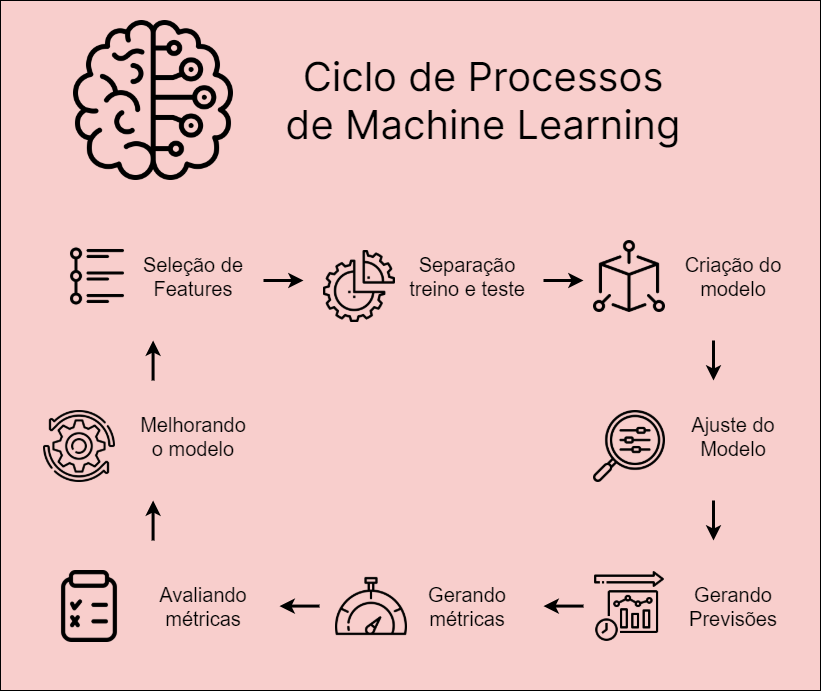

<img src='https://cdn-images-1.medium.com/max/640/1*eeIvlwkMNG1wSmj3FR6M2g.gif'>

## **Preparação dos Dados**

### Variáveis Dummy

In [26]:
dataset\
    .groupBy("customerID")\
    .pivot('unit')\
    .agg(f.lit(1))\
    .na\
    .fill(0)\
    .show()


+---------------+-----------+----+------+
|     customerID|Apartamento|Casa|Outros|
+---------------+-----------+----+------+
|062130-QKYMWGMV|          1|   0|     0|
|630945-AEEUPRXI|          0|   1|     0|
|994985-OZQNHQKH|          1|   0|     0|
|494674-JWXRZIBM|          1|   0|     0|
|458844-UJCRFSRI|          1|   0|     0|
|155284-BRCDAOIQ|          1|   0|     0|
|396742-DUXBHLRU|          1|   0|     0|
|916072-ZJXARAXO|          1|   0|     0|
|943843-BVTWWHRQ|          1|   0|     0|
|193126-MTNIIFQN|          1|   0|     0|
|319762-UXTTQYFS|          1|   0|     0|
|931151-GZCTKADB|          1|   0|     0|
|103840-OFKPFEZJ|          0|   1|     0|
|176885-NNKZRQGM|          0|   1|     0|
|926638-PBYRAZYR|          1|   0|     0|
|744421-IZJWISWB|          1|   0|     0|
|530012-TYGLQMER|          1|   0|     0|
|209407-GTEUOVKR|          1|   0|     0|
|289667-ZPHGFHJH|          1|   0|     0|
|859388-EYTPMKER|          1|   0|     0|
+---------------+-----------+----+

In [27]:
unit = dataset\
    .groupBy('customerID')\
    .pivot('unit')\
    .agg(f.lit(1))\
    .na\
    .fill(0)


In [28]:
zone = dataset\
    .groupBy('customerID')\
    .pivot('zone')\
    .agg(f.lit(1))\
    .na\
    .fill(0)


In [29]:
dataset = dataset\
    .join(unit, 'customerID', how='inner')\
    .join(zone, 'customerID', how='inner')


In [30]:
dataset.show()

+---------------+-----------+-----------+---------+--------+------+-------------+------+---------+---------------+-----------+--------------------+------------+-----+-----+----+-----------+----+------+------------+----------+----------+--------+
|     customerID|       unit|      usage|bathrooms|bedrooms|floors|parkingSpaces|suites|unitFloor|unitsOnTheFloor|usableAreas|        neighborhood|        zone|price|condo|iptu|Apartamento|Casa|Outros|Zona Central|Zona Norte|Zona Oeste|Zona Sul|
+---------------+-----------+-----------+---------+--------+------+-------------+------+---------+---------------+-----------+--------------------+------------+-----+-----+----+-----------+----+------+------------+----------+----------+--------+
|775564-BOJSMVON|     Outros|Residencial|        0|       0|     0|            1|     0|        0|              0|         62|             Taquara|  Zona Oeste|45000|  150|   0|          0|   0|     1|           0|         0|         1|       0|
|660895-AUENKNYY

In [31]:
from pyspark.ml.feature import VectorAssembler


In [32]:
dataset = dataset.withColumnRenamed('price','label')


In [33]:
dataset = dataset.dropna(subset=['condo'])
dataset = dataset.dropna(subset=['iptu'])

In [34]:
dataset.show()

+---------------+-----------+-----------+---------+--------+------+-------------+------+---------+---------------+-----------+--------------------+------------+-----+-----+----+-----------+----+------+------------+----------+----------+--------+
|     customerID|       unit|      usage|bathrooms|bedrooms|floors|parkingSpaces|suites|unitFloor|unitsOnTheFloor|usableAreas|        neighborhood|        zone|label|condo|iptu|Apartamento|Casa|Outros|Zona Central|Zona Norte|Zona Oeste|Zona Sul|
+---------------+-----------+-----------+---------+--------+------+-------------+------+---------+---------------+-----------+--------------------+------------+-----+-----+----+-----------+----+------+------------+----------+----------+--------+
|775564-BOJSMVON|     Outros|Residencial|        0|       0|     0|            1|     0|        0|              0|         62|             Taquara|  Zona Oeste|45000|  150|   0|          0|   0|     1|           0|         0|         1|       0|
|660895-AUENKNYY

In [35]:
dataset\
        .withColumn('usableAreas', dataset['usableAreas'].cast(IntegerType()))\
        .withColumn('condo', dataset['condo'].cast(DoubleType()))\
        .withColumn('iptu', dataset['iptu'].cast(DoubleType()))\
        .printSchema()


root
 |-- customerID: string (nullable = true)
 |-- unit: string (nullable = true)
 |-- usage: string (nullable = true)
 |-- bathrooms: long (nullable = true)
 |-- bedrooms: long (nullable = true)
 |-- floors: long (nullable = true)
 |-- parkingSpaces: long (nullable = true)
 |-- suites: long (nullable = true)
 |-- unitFloor: long (nullable = true)
 |-- unitsOnTheFloor: long (nullable = true)
 |-- usableAreas: integer (nullable = true)
 |-- neighborhood: string (nullable = true)
 |-- zone: string (nullable = true)
 |-- label: string (nullable = true)
 |-- condo: double (nullable = true)
 |-- iptu: double (nullable = true)
 |-- Apartamento: integer (nullable = true)
 |-- Casa: integer (nullable = true)
 |-- Outros: integer (nullable = true)
 |-- Zona Central: integer (nullable = true)
 |-- Zona Norte: integer (nullable = true)
 |-- Zona Oeste: integer (nullable = true)
 |-- Zona Sul: integer (nullable = true)



In [36]:
X = [
    'bathrooms',
    'bedrooms',
    'floors',
    'parkingSpaces',
    'suites',
    'unitFloor',
    'unitsOnTheFloor',
    'usableAreas',
    'condo',
    'iptu',
    'Apartamento',
    'Casa',
    'Outros',
    'Zona Central',
    'Zona Norte',
    'Zona Oeste',
    'Zona Sul'
]


In [37]:
assembler = VectorAssembler(inputCols = X, outputCol = 'features')


In [38]:
from pyspark.sql.functions import col

# Converter as colunas para tipos de dados numéricos
dataset = dataset.withColumn("usableAreas", col("usableAreas").cast("integer"))
dataset = dataset.withColumn("condo", col("condo").cast("double"))
dataset = dataset.withColumn("iptu", col("iptu").cast("double"))

# Remover linhas com valores não numéricos nas colunas convertidas
dataset = dataset.filter(col("usableAreas").isNotNull() &
                         col("condo").isNotNull() &
                         col("iptu").isNotNull())

# Continuar com o processamento, como a criação do DataFrame de treinamento
dataset_prep = assembler.transform(dataset).select('features', 'label')

In [39]:
dataset_prep.show(10, truncate=False)


23/10/16 20:12:41 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+--------------------------------------------------------------------------+-----+
|features                                                                  |label|
+--------------------------------------------------------------------------+-----+
|(17,[3,7,8,12,15],[1.0,62.0,150.0,1.0,1.0])                               |45000|
|(17,[0,1,3,7,8,10,15],[1.0,2.0,1.0,44.0,120.0,1.0,1.0])                   |45000|
|(17,[7,8,12,15],[132.0,100.0,1.0,1.0])                                    |50000|
|(17,[0,5,7,8,9,12,14],[1.0,3.0,32.0,468.0,346.0,1.0,1.0])                 |45000|
|[2.0,3.0,3.0,1.0,1.0,2.0,4.0,60.0,400.0,120.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0]|50000|
|(17,[0,5,7,8,9,12,15],[1.0,2.0,25.0,801.0,211.0,1.0,1.0])                 |50000|
|(17,[0,1,3,7,10,14],[1.0,1.0,1.0,33.0,1.0,1.0])                           |45336|
|(17,[7,12,15],[120.0,1.0,1.0])                                            |45000|
|(17,[7,12,15],[468.0,1.0,1.0])                                            |45000|
|(17

## **Exploração dos Dados**

In [40]:
from pyspark.ml.stat import Correlation
import pandas as pd


In [41]:
correlacao = Correlation.corr(dataset_prep, 'features').collect()

23/10/16 20:12:55 WARN InstanceBuilder: Failed to load implementation from:dev.ludovic.netlib.blas.JNIBLAS


In [42]:
correlacao

[Row(pearson(features)=DenseMatrix(17, 17, [1.0, 0.6607, -0.0476, 0.4101, 0.7475, 0.0052, -0.1124, 0.5784, ..., 0.0062, 0.1996, -0.192, -0.0611, -0.0991, -0.2935, -0.6435, 1.0], False))]

In [43]:
# [Row(pearson(features)=DenseMatrix(17, 17, [1.0, 0.6607, -0.0476, 0.4101, 0.7475, 0.0052, -0.1124, 0.5784, ..., 0.0062, 0.1996, -0.192, -0.0611, -0.0991, -0.2935, -0.6435, 1.0], False))]

In [44]:
correlacao = Correlation.corr(dataset_prep, 'features').collect()[0][0]

In [45]:
correlacao

DenseMatrix(17, 17, [1.0, 0.6607, -0.0476, 0.4101, 0.7475, 0.0052, -0.1124, 0.5784, ..., 0.0062, 0.1996, -0.192, -0.0611, -0.0991, -0.2935, -0.6435, 1.0], False)

<img src='https://media.discordapp.net/attachments/888468711906893834/968929975963119626/unknown.png'>

In [46]:
correlacao.toArray()

array([[ 1.00000000e+00,  6.60707376e-01, -4.75510451e-02,
         4.10143686e-01,  7.47478164e-01,  5.23460058e-03,
        -1.12423116e-01,  5.78401168e-01,  1.86731789e-02,
         1.17620342e-02, -1.56021343e-01,  3.39782592e-01,
        -2.00002537e-01, -9.21899446e-02, -1.43914638e-01,
         2.26905733e-01, -9.75003530e-02],
       [ 6.60707376e-01,  1.00000000e+00, -7.34461553e-02,
         3.45684272e-01,  6.09973015e-01, -8.89728965e-03,
        -1.39870663e-01,  4.84285667e-01,  1.55114738e-02,
         7.46461383e-03,  2.38097219e-02,  3.18884790e-01,
        -4.53801330e-01, -1.90464701e-01, -8.64130527e-02,
         1.42257023e-01, -1.87985545e-02],
       [-4.75510451e-02, -7.34461553e-02,  1.00000000e+00,
        -4.68946696e-02, -5.09352775e-02,  1.21739734e-01,
         6.65490583e-01, -1.13508882e-01,  1.11742931e-02,
         5.01734682e-03,  1.39929755e-01, -1.43852879e-01,
        -3.08022437e-02,  1.23297003e-01,  5.74353567e-03,
        -4.01466532e-02, -2.6

In [47]:
dataframe_correlacao = pd.DataFrame(correlacao.toArray(), columns=X, index=X)

In [48]:
dataframe_correlacao


,bathrooms,bedrooms,floors,parkingSpaces,suites,unitFloor,unitsOnTheFloor,usableAreas,condo,iptu,Apartamento,Casa,Outros,Zona Central,Zona Norte,Zona Oeste,Zona Sul
bathrooms,1.000000,0.660707,-0.047551,0.410144,0.747478,0.005235,-0.112423,0.578401,0.018673,0.011762,-0.156021,0.339783,-0.200003,-0.092190,-0.143915,0.226906,-0.097500
bedrooms,0.660707,1.000000,-0.073446,0.345684,0.609973,-0.008897,-0.139871,0.484286,0.015511,0.007465,0.023810,0.318885,-0.453801,-0.190465,-0.086413,0.142257,-0.018799
floors,-0.047551,-0.073446,1.000000,-0.046895,-0.050935,0.121740,0.665491,-0.113509,0.011174,0.005017,0.139930,-0.143853,-0.030802,0.123297,0.005744,-0.040147,-0.002659
parkingSpaces,0.410144,0.345684,-0.046895,1.000000,0.405509,0.000329,-0.067776,0.433210,0.015542,0.006017,-0.163505,0.250312,-0.071423,-0.093984,-0.077282,0.238345,-0.166545
suites,0.747478,0.609973,-0.050935,0.405509,1.000000,0.003117,-0.097455,0.540538,0.022877,0.015732,-0.115755,0.305006,-0.217512,-0.114216,-0.199677,0.315019,-0.140201
unitFloor,0.005235,-0.008897,0.121740,0.000329,0.003117,1.000000,0.083112,-0.017415,0.003060,0.000678,0.031950,-0.034265,-0.005180,0.027617,-0.004840,0.003947,-0.009740
unitsOnTheFloor,-0.112423,-0.139871,0.665491,-0.067776,-0.097455,0.083112,1.000000,-0.151229,-0.003271,0.002282,0.071266,-0.131014,0.059756,0.114081,0.052586,-0.006116,-0.077348
usableAreas,0.578401,0.484286,-0.113509,0.433210,0.540538,-0.017415,-0.151229,1.000000,0.019248,0.024771,-0.381241,0.437058,0.024967,-0.046638,-0.132746,0.175552,-0.065626
condo,0.018673,0.015511,0.011174,0.015542,0.022877,0.003060,-0.003271,0.019248,1.000000,0.203223,0.010167,-0.009779,-0.003118,-0.000483,-0.011414,-0.002998,0.013253
iptu,0.011762,0.007465,0.005017,0.006017,0.015732,0.000678,0.002282,0.024771,0.203223,1.000000,-0.004168,0.001692,0.004304,-0.001982,-0.002990,-0.002642,0.006173


In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

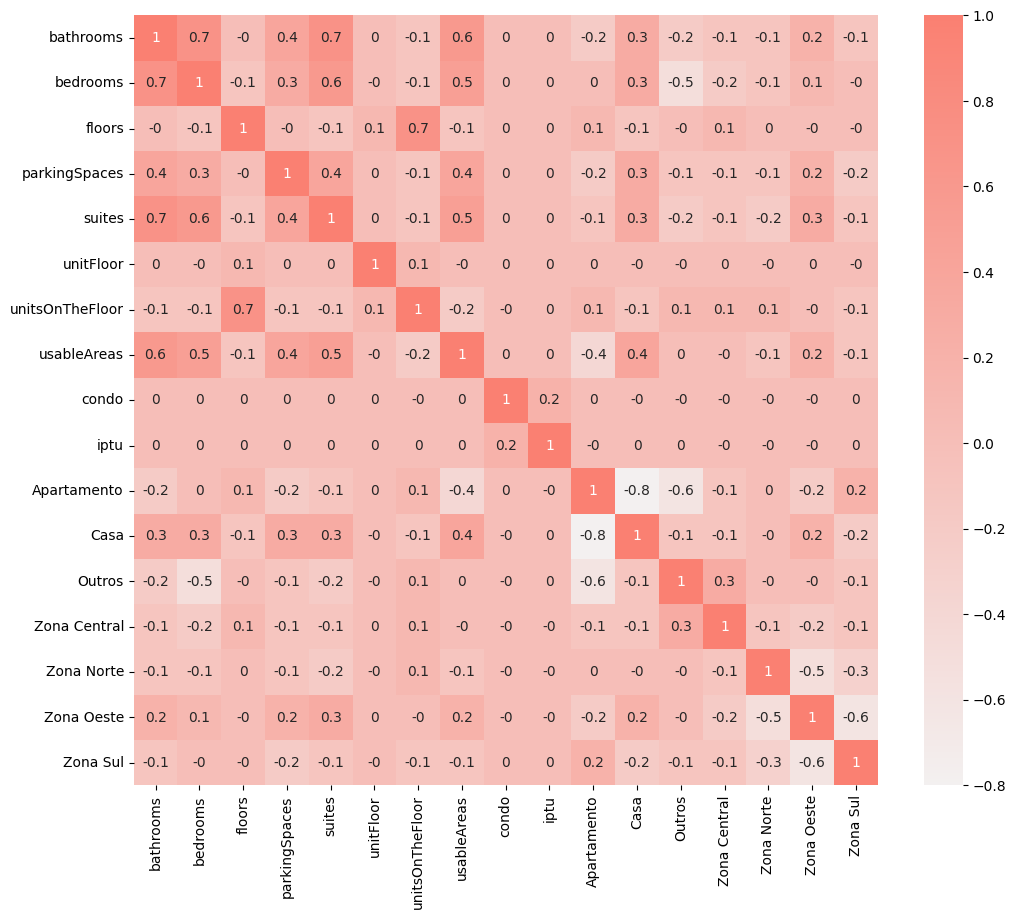

In [50]:
plt.figure(figsize=(12,10))
paleta = sns.color_palette("light:salmon", as_cmap=True)
sns.heatmap(dataframe_correlacao.round(1), annot=True, cmap=paleta)


## **Ajuste e Previsão**

<font size=2>**Documentação:**</font>
<font size=2>[randomSplit](https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.sql.DataFrame.randomSplit.html)</font> |
<font size=2>[LinearRegression](https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.ml.regression.LinearRegression.html)</font>

In [51]:
from pyspark.ml.regression import LinearRegression


In [52]:
treino, teste = dataset_prep.randomSplit([0.7, 0.3], seed=101)


In [53]:
treino.count() 

44242

In [54]:
teste.count()



19074

In [55]:
lr = LinearRegression()


In [56]:
from pyspark.sql.functions import col

treino = treino.withColumn("label", col("label").cast("double"))


In [57]:
modelo_lr = lr.fit(treino)


23/10/16 20:13:18 WARN Instrumentation: [60d86378] regParam is zero, which might cause numerical instability and overfitting.
23/10/16 20:13:20 WARN InstanceBuilder: Failed to load implementation from:dev.ludovic.netlib.lapack.JNILAPACK
23/10/16 20:13:20 WARN Instrumentation: [60d86378] Cholesky solver failed due to singular covariance matrix. Retrying with Quasi-Newton solver.


In [58]:
previsoes_lr_treino = modelo_lr.transform(treino)

previsoes_lr_treino.show()


+--------------------+--------+------------------+
|            features|   label|        prediction|
+--------------------+--------+------------------+
|(17,[0,1,2,3,4,5,...|260000.0|397345.93141219043|
|(17,[0,1,2,3,4,5,...|500000.0|1028630.8456170048|
|(17,[0,1,2,3,4,5,...|308615.0|183322.61165039023|
|(17,[0,1,2,3,4,5,...|279000.0| 188823.7407842776|
|(17,[0,1,2,3,4,5,...|545000.0|351576.65649099136|
|(17,[0,1,2,3,4,5,...|449000.0| 387060.2469813683|
|(17,[0,1,2,3,4,5,...|479000.0|401104.03078306676|
|(17,[0,1,2,3,4,5,...|420000.0| 710267.5870885476|
|(17,[0,1,2,3,4,5,...|265000.0| 525703.0834955631|
|(17,[0,1,2,3,4,5,...|490000.0|  815301.870481078|
|(17,[0,1,2,3,4,5,...|650000.0| 659344.1951970384|
|(17,[0,1,2,3,4,5,...|340000.0| 522825.6374637275|
|(17,[0,1,2,3,4,5,...|190000.0| 435816.7464386901|
|(17,[0,1,2,3,4,5,...|896000.0| 604983.1174910567|
|(17,[0,1,2,3,4,5,...|679000.0| 836929.3466009981|
|(17,[0,1,2,3,4,5,...|948000.0| 618297.0557591477|
|(17,[0,1,2,3,4,5,...|880000.0|

## **Métricas**

In [59]:
resumo_treino = modelo_lr.summary
resumo_treino


In [60]:
resumo_treino.r2

0.6440416644693601

In [61]:
resumo_treino.rootMeanSquaredError


838582.8366849514

In [62]:
resumo_teste = modelo_lr.evaluate(teste)



In [63]:
resumo_teste.r2

0.6452771536504642

In [64]:
resumo_teste.rootMeanSquaredError

853986.0592635488

### **Tabela Resumo Regressão Linear**

In [65]:
print('Linear Regression')
print("="*30)
print("Dados de Treino")
print("="*30)
print("R²: %f" % resumo_treino.r2)
print("RMSE: %f" % resumo_treino.rootMeanSquaredError)
print("")
print("="*30)
print("Dados de Teste")
print("="*30)
print("R²: %f" % resumo_teste.r2)
print("RMSE: %f" % resumo_teste.rootMeanSquaredError)


Linear Regression
Dados de Treino
R²: 0.644042
RMSE: 838582.836685

Dados de Teste
R²: 0.645277
RMSE: 853986.059264


# **Aula 3 - Árvore de Decisão - Regressão**

## **O Modelo**


<img src='https://raw.githubusercontent.com/pedrohcmds/alura_testes/main/Árvore%20de%20Decisão%20-%20Regressão%20(2).gif'>

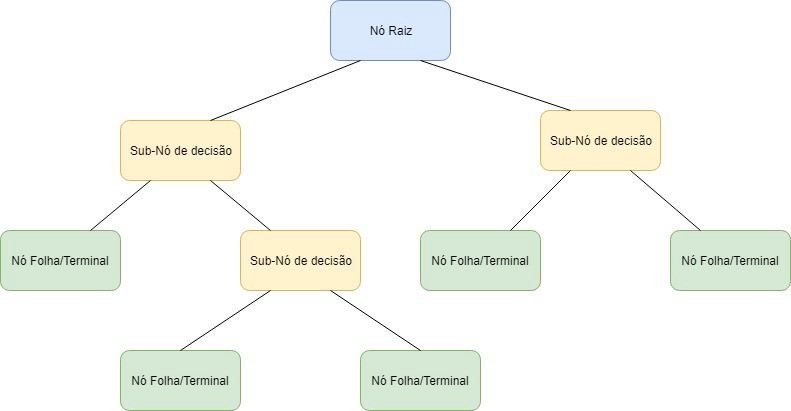

## **Ajuste e Previsão**


<font size=2>**Documentação:**</font>
<font size=2>[DecisionTreeRegressor](https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.ml.regression.DecisionTreeRegressor.html)</font>

In [66]:
from pyspark.ml.regression import DecisionTreeRegressor


In [67]:
dtr = DecisionTreeRegressor(seed=191, maxDepth=7)


In [68]:
modelo_dtr = dtr.fit(treino)


In [69]:
previsoes_dtr_treino = modelo_dtr.transform(treino)


In [70]:
previsoes_dtr_treino.show()


+--------------------+--------+------------------+
|            features|   label|        prediction|
+--------------------+--------+------------------+
|(17,[0,1,2,3,4,5,...|260000.0| 356889.0243204578|
|(17,[0,1,2,3,4,5,...|500000.0|493469.61368977674|
|(17,[0,1,2,3,4,5,...|308615.0| 356889.0243204578|
|(17,[0,1,2,3,4,5,...|279000.0| 356889.0243204578|
|(17,[0,1,2,3,4,5,...|545000.0|493469.61368977674|
|(17,[0,1,2,3,4,5,...|449000.0|493469.61368977674|
|(17,[0,1,2,3,4,5,...|479000.0|493469.61368977674|
|(17,[0,1,2,3,4,5,...|420000.0| 662227.4538378959|
|(17,[0,1,2,3,4,5,...|265000.0|493469.61368977674|
|(17,[0,1,2,3,4,5,...|490000.0| 662227.4538378959|
|(17,[0,1,2,3,4,5,...|650000.0| 662227.4538378959|
|(17,[0,1,2,3,4,5,...|340000.0|493469.61368977674|
|(17,[0,1,2,3,4,5,...|190000.0| 356889.0243204578|
|(17,[0,1,2,3,4,5,...|896000.0| 662227.4538378959|
|(17,[0,1,2,3,4,5,...|679000.0| 662227.4538378959|
|(17,[0,1,2,3,4,5,...|948000.0| 662227.4538378959|
|(17,[0,1,2,3,4,5,...|880000.0|

## **Métricas**

<font size=2>**Documentação:**</font>
<font size=2>[RegressionEvaluator](https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.ml.evaluation.RegressionEvaluator.html)</font>

In [71]:
from pyspark.ml.evaluation import RegressionEvaluator


In [72]:
evaluator = RegressionEvaluator()


In [73]:
evaluator = RegressionEvaluator()

print(evaluator.evaluate(previsoes_dtr_treino, {evaluator.metricName: "r2"}))
print(evaluator.evaluate(previsoes_dtr_treino, {evaluator.metricName: "rmse"}))


0.7912884948808894


642125.0030038531


In [74]:
previsoes_dtr_teste = modelo_dtr.transform(teste)


In [75]:
previsoes_dtr_teste.show()


+--------------------+-------+------------------+
|            features|  label|        prediction|
+--------------------+-------+------------------+
|(17,[0,1,2,3,4,5,...| 199000| 356889.0243204578|
|(17,[0,1,2,3,4,5,...| 350000| 662227.4538378959|
|(17,[0,1,2,3,4,5,...| 430000|493469.61368977674|
|(17,[0,1,2,3,4,5,...| 449000|493469.61368977674|
|(17,[0,1,2,3,4,5,...| 439000|493469.61368977674|
|(17,[0,1,2,3,4,5,...| 333000| 356889.0243204578|
|(17,[0,1,2,3,4,5,...| 620000|493469.61368977674|
|(17,[0,1,2,3,4,5,...| 727000|493469.61368977674|
|(17,[0,1,2,3,4,5,...| 447600| 356889.0243204578|
|(17,[0,1,2,3,4,5,...| 956930| 662227.4538378959|
|(17,[0,1,2,3,4,5,...| 229900| 662227.4538378959|
|(17,[0,1,2,3,4,5,...| 405000|493469.61368977674|
|(17,[0,1,2,3,4,5,...| 948375|1041343.3545133636|
|(17,[0,1,2,3,4,5,...|1299500|1041343.3545133636|
|(17,[0,1,2,3,4,5,...| 620000| 356889.0243204578|
|(17,[0,1,2,3,4,5,...| 270000| 356889.0243204578|
|(17,[0,1,2,3,4,5,...| 285000| 356889.0243204578|


In [76]:
print('Decision Tree Regression')
print("="*30)
print("Dados de Treino")
print("="*30)
print("R²: %f" % evaluator.evaluate(previsoes_dtr_treino, {evaluator.metricName: "r2"}))
print("RMSE: %f" % evaluator.evaluate(previsoes_dtr_treino, {evaluator.metricName: "rmse"}))
print("")
print("="*30)
print("Dados de Teste")
print("="*30)
print("R²: %f" % evaluator.evaluate(previsoes_dtr_teste, {evaluator.metricName: "r2"}))
print("RMSE: %f" % evaluator.evaluate(previsoes_dtr_teste, {evaluator.metricName: "rmse"}))


Decision Tree Regression
Dados de Treino


R²: 0.791288


RMSE: 642125.003004

Dados de Teste


IllegalArgumentException: requirement failed: Column label must be of type numeric but was actually of type string.

# **Aula 4 - Random Forest - Regressão**

## **O Modelo**

### Random Forest

<img src='https://1.bp.blogspot.com/-Ax59WK4DE8w/YK6o9bt_9jI/AAAAAAAAEQA/9KbBf9cdL6kOFkJnU39aUn4m8ydThPenwCLcBGAsYHQ/s0/Random%2BForest%2B03.gif'>

## **Ajuste e Previsão**

<font size=2>**Documentação:**</font>
<font size=2>[RandomForestRegressor](https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.ml.regression.RandomForestRegressor.html)</font>

In [81]:
from pyspark.ml.regression import RandomForestRegressor


In [82]:
rfr = RandomForestRegressor(seed=101, maxDepth=7, numTrees=10)

In [83]:
modelo_rfr = rfr.fit(treino)

In [88]:
previsoes_rfr_treino = modelo_rfr.transform(treino)

In [89]:
previsoes_rfr_treino.show()

+--------------------+--------+------------------+
|            features|   label|        prediction|
+--------------------+--------+------------------+
|(17,[0,1,2,3,4,5,...|260000.0| 337177.7463947441|
|(17,[0,1,2,3,4,5,...|500000.0|459163.15385341493|
|(17,[0,1,2,3,4,5,...|308615.0| 329724.9176255809|
|(17,[0,1,2,3,4,5,...|279000.0| 329724.9176255809|
|(17,[0,1,2,3,4,5,...|545000.0| 406805.5365203128|
|(17,[0,1,2,3,4,5,...|449000.0| 406805.5365203128|
|(17,[0,1,2,3,4,5,...|479000.0| 406805.5365203128|
|(17,[0,1,2,3,4,5,...|420000.0| 919214.6409750022|
|(17,[0,1,2,3,4,5,...|265000.0| 442097.2771638225|
|(17,[0,1,2,3,4,5,...|490000.0| 769197.7418825466|
|(17,[0,1,2,3,4,5,...|650000.0| 641580.4572468468|
|(17,[0,1,2,3,4,5,...|340000.0|489755.10771961574|
|(17,[0,1,2,3,4,5,...|190000.0|389567.44321805245|
|(17,[0,1,2,3,4,5,...|896000.0| 641580.4572468468|
|(17,[0,1,2,3,4,5,...|679000.0| 819112.8180809151|
|(17,[0,1,2,3,4,5,...|948000.0| 641580.4572468468|
|(17,[0,1,2,3,4,5,...|880000.0|

## **Métricas**

In [90]:
print(evaluator.evaluate(previsoes_rfr_treino, {evaluator.metricName: "r2"}))
print(evaluator.evaluate(previsoes_rfr_treino, {evaluator.metricName: "rmse"}))


0.8014289202931016


626331.6878091802


In [91]:
previsoes_rfr_teste = modelo_rfr.transform(teste)

In [92]:
previsoes_rfr_teste.show()

+--------------------+-------+------------------+
|            features|  label|        prediction|
+--------------------+-------+------------------+
|(17,[0,1,2,3,4,5,...| 199000| 329724.9176255809|
|(17,[0,1,2,3,4,5,...| 350000|  740292.191710213|
|(17,[0,1,2,3,4,5,...| 430000|505925.77010259574|
|(17,[0,1,2,3,4,5,...| 449000|416435.32630647614|
|(17,[0,1,2,3,4,5,...| 439000|468445.58091077796|
|(17,[0,1,2,3,4,5,...| 333000|389567.44321805245|
|(17,[0,1,2,3,4,5,...| 620000|505925.77010259574|
|(17,[0,1,2,3,4,5,...| 727000|505925.77010259574|
|(17,[0,1,2,3,4,5,...| 447600|389567.44321805245|
|(17,[0,1,2,3,4,5,...| 956930| 641580.4572468468|
|(17,[0,1,2,3,4,5,...| 229900| 769197.7418825466|
|(17,[0,1,2,3,4,5,...| 405000| 442097.2771638225|
|(17,[0,1,2,3,4,5,...| 948375|1038918.3554493658|
|(17,[0,1,2,3,4,5,...|1299500|1038918.3554493658|
|(17,[0,1,2,3,4,5,...| 620000|332165.82165941095|
|(17,[0,1,2,3,4,5,...| 270000|332165.82165941095|
|(17,[0,1,2,3,4,5,...| 285000|332165.82165941095|


In [93]:
print('Random Forest Regression')
print("="*30)
print("Dados de Treino")
print("="*30)
print("R²: %f" % evaluator.evaluate(previsoes_rfr_treino, {evaluator.metricName: "r2"}))
print("RMSE: %f" % evaluator.evaluate(previsoes_rfr_treino, {evaluator.metricName: "rmse"}))
print("")
print("="*30)
print("Dados de Teste")
print("="*30)
print("R²: %f" % evaluator.evaluate(previsoes_rfr_teste, {evaluator.metricName: "r2"}))
print("RMSE: %f" % evaluator.evaluate(previsoes_rfr_teste, {evaluator.metricName: "rmse"}))


Random Forest Regression
Dados de Treino


R²: 0.801429


RMSE: 626331.687809

Dados de Teste


IllegalArgumentException: requirement failed: Column label must be of type numeric but was actually of type string.

# **Aula 5 - Técnicas de Otimização**

## **Ferramentas**

### Cross Validation

<img src='https://miro.medium.com/max/1400/1*kkMtezwv8qj1t9uG4nw_8g.png'>

## **Árvore de Decisão com Cross Validation**

<font size=2>**Documentação:**</font>
<font size=2>[CrossValidator](https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.ml.tuning.CrossValidator.html)</font> |
<font size=2>[ParamGridBuilder](https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.ml.tuning.ParamGridBuilder.html)</font>

In [94]:
from pyspark.ml.regression import DecisionTreeRegressor
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.ml.evaluation import RegressionEvaluator


In [95]:
grid = ParamGridBuilder() \
    .addGrid(dtr.maxDepth, [2, 5, 10]) \
    .addGrid(dtr.maxBins, [10, 32, 45]) \
    .build()


In [96]:
evaluator = RegressionEvaluator()


In [97]:
dtr_cv = CrossValidator(
    estimator=dtr,
    estimatorParamMaps=grid,
    evaluator=evaluator,
    numFolds=3,
        seed = 101
)


In [98]:
modelo_dtr_cv = dtr_cv.fit(treino)


In [99]:
previsoes_dtr_cv_teste = modelo_dtr_cv.transform(teste)


In [101]:

# O código que você apresentou está usando o PySpark MLlib, uma biblioteca para aprendizado de máquina em Spark, para criar uma grade (grid) de hiperparâmetros a serem usados na configuração de um modelo de árvore de decisão (DecisionTreeRegressor).

# Aqui está uma explicação do código linha por linha:

# grid = ParamGridBuilder(): Isso cria uma instância do construtor de parâmetros ParamGridBuilder. Essa classe é usada para construir uma grade de hiperparâmetros que será usada na pesquisa de hiperparâmetros.

# .addGrid(dtr.maxDepth, [2, 5, 10]): Aqui, você está adicionando uma grade para o hiperparâmetro maxDepth de um modelo de regressão de árvore de decisão (dtr). Ele especifica a profundidade máxima da árvore. A grade contém três valores possíveis: 2, 5 e 10. Isso significa que o algoritmo tentará treinar e avaliar o modelo para cada combinação de valores do maxDepth na grade.

# .addGrid(dtr.maxBins, [10, 32, 45]): Da mesma forma, você está adicionando uma grade para o hiperparâmetro maxBins, que especifica o número máximo de caixas (bins) que podem ser criadas ao dividir recursos categóricos (por exemplo, ao fazer a divisão em um nó da árvore). A grade contém três valores possíveis: 10, 32 e 45.

# .build(): Essa chamada finaliza a construção da grade de hiperparâmetros e cria a grade completa com todas as combinações possíveis de valores de hiperparâmetros.



## **Random Forest com Cross Validation**


In [102]:
from pyspark.ml.regression import RandomForestRegressor


In [103]:
rfr = RandomForestRegressor()


In [104]:
grid = ParamGridBuilder() \
    .addGrid(rfr.numTrees, [10, 20, 30]) \
    .addGrid(rfr.maxDepth, [5, 10]) \
    .addGrid(rfr.maxBins, [10, 32, 45]) \
    .build()


In [105]:
evaluator = RegressionEvaluator()


In [106]:
rfr_cv = CrossValidator(
    estimator=rfr,
    estimatorParamMaps=grid,
    evaluator=evaluator,
    numFolds=3
)


In [107]:
modelo_rfr_cv = rfr_cv.fit(treino)


23/10/16 21:43:23 WARN DAGScheduler: Broadcasting large task binary with size 1504.7 KiB
23/10/16 21:43:26 WARN DAGScheduler: Broadcasting large task binary with size 1463.5 KiB
23/10/16 21:43:29 WARN DAGScheduler: Broadcasting large task binary with size 1464.0 KiB
23/10/16 21:43:36 WARN DAGScheduler: Broadcasting large task binary with size 1635.9 KiB
23/10/16 21:43:36 WARN DAGScheduler: Broadcasting large task binary with size 2.7 MiB
23/10/16 21:43:39 WARN DAGScheduler: Broadcasting large task binary with size 1608.2 KiB
23/10/16 21:43:40 WARN DAGScheduler: Broadcasting large task binary with size 2.6 MiB
23/10/16 21:43:43 WARN DAGScheduler: Broadcasting large task binary with size 1595.9 KiB
23/10/16 21:43:44 WARN DAGScheduler: Broadcasting large task binary with size 2.6 MiB
23/10/16 21:43:54 WARN DAGScheduler: Broadcasting large task binary with size 1348.5 KiB
23/10/16 21:43:54 WARN DAGScheduler: Broadcasting large task binary with size 2.3 MiB
23/10/16 21:43:56 WARN DAGSchedul

In [108]:
previsoes_rfr_cv_teste = modelo_rfr_cv.transform(teste)


### **Processos de Machine Learning** 
::

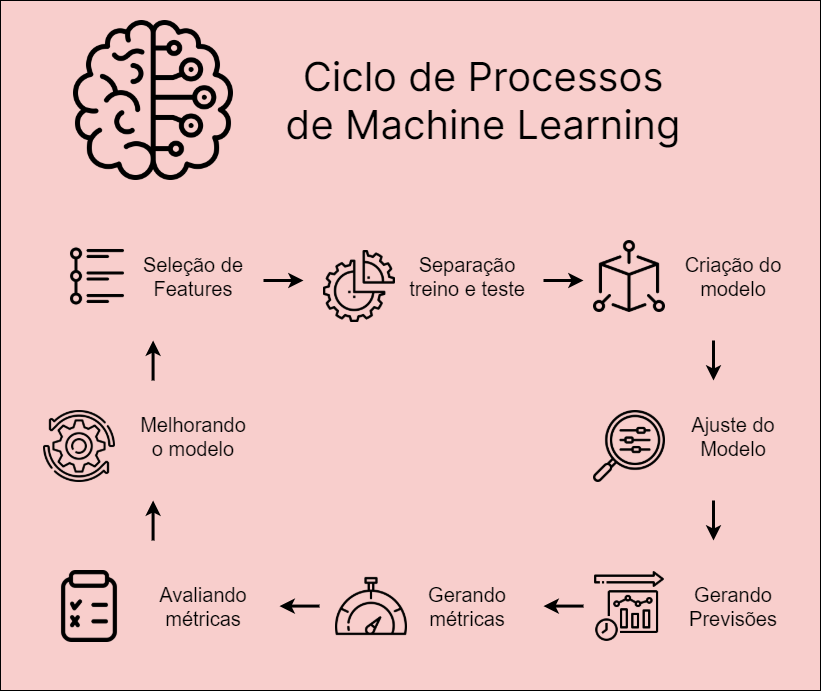

##Prevendo Resultados com o Melhor modelo

In [109]:
X

[   'bathrooms',
    'bedrooms',
    'floors',
    'parkingSpaces',
    'suites',
    'unitFloor',
    'unitsOnTheFloor',
    'usableAreas',
    'condo',
    'iptu',
    'Apartamento',
    'Casa',
    'Outros',
    'Zona Central',
    'Zona Norte',
    'Zona Oeste',
    'Zona Sul']


['bathrooms',
 'bedrooms',
 'floors',
 'parkingSpaces',
 'suites',
 'unitFloor',
 'unitsOnTheFloor',
 'usableAreas',
 'condo',
 'iptu',
 'Apartamento',
 'Casa',
 'Outros',
 'Zona Central',
 'Zona Norte',
 'Zona Oeste',
 'Zona Sul']

In [111]:
novo_imovel = [{
'bathrooms': 2,
'bedrooms': 2,
'floors': 2,
'parkingSpaces': 1,
'suites': 1,
'unitFloor':0,
'unitsOnTheFloor':0,
'usableAreas':200,
'condo':200,
'iptu':0,
'Apartamento':0,
'Casa':1,
'Outros':0,
'Zona Central':0,
'Zona Norte':0,
'Zona Oeste':0,
'Zona Sul':1,
    'label': 0}]


In [112]:
meu_imovel = spark.createDataFrame(novo_imovel)


In [113]:
assembler = VectorAssembler(inputCols = X, outputCol = 'features')


In [114]:
meu_lar_vetorizado = assembler.transform(meu_imovel).select('features', 'label')


In [115]:
modelo_rfr_cv.transform(meu_lar_vetorizado).show()


+--------------------+-----+-----------------+
|            features|label|       prediction|
+--------------------+-----+-----------------+
|(17,[0,1,2,3,4,7,...|    0|2031257.594569039|
+--------------------+-----+-----------------+



## **Conclusão**